# Analysis of zeb BP2-CaM compact
## Comparison of ca-mg-1-2 and ca-only

In [1]:
import sys
import os
import pandas as pd
import numpy as np

# Add the lda directory to Python path
lda_path = os.path.join(os.getcwd(), 'lda')
if lda_path not in sys.path:
    sys.path.append(lda_path)

# Import the interactive pipeline functions
from pipeline_helper import run_interactive_pipeline, create_interactive_pipeline_configs, summarize_and_evaluate

# Import your existing data access module
from data_access import create_dataframe_factory, list_available_constructs_subconstructs

print("✅ Imports completed successfully!")

✅ Imports completed successfully!


In [2]:
data_dir = '/work/hdd/bfri/jjeong7/analysis_output/dist_maps'
constructs_dict, subconstructs_dict = list_available_constructs_subconstructs(base_dir=data_dir)

# Specific states of specific proteins
data_factory = create_dataframe_factory(
    base_dir=data_dir, 
    constructs=['calmodulin-compact'],
    subconstructs=['ca-only','ca-mg-1-2'],
    apply_boundary_filter=True, # 🛠️ ACTIVATE TRANSFORMATION
    n_edge=3,
    min_frame=0,
)

In [3]:
# Create all possible pipeline combinations
configs = create_interactive_pipeline_configs()

🚀 Starting Interactive Pipeline Runner
💡 Variance runs first, then feature selection, then dimensionality reduction
⚙️  You'll set parameters for each phase

PHASE 1: VARIANCE


Found cached result for VARIANCE (pipeline_cache/variance.pkl). Load? (Y/n):  n



[VARIANCE]
⚙️  Hyperparameters:
  show_plot: True - Show variance plots for analysis
  knee_S: 1.0 - Knee detection sensitivity - higher = more features
  outlier_multiplier: 3.0 - Outlier detection threshold multiplier
  fallback_percentile: 90 - Fallback percentile for threshold
  min_clean_ratio: 0.5 - Min fraction of features to keep in 'clean' set before reverting to full data



Modify? (y/N):  n


Running VARIANCE...
Pass 1: Analyzing feature variance (Streaming from disk)...
📊 Filtered 120 files down to 20 matching criteria
Loaded 144 canonical residues from /work/hdd/bfri/jjeong7/analysis_output/dist_maps/calmodulin-compact/ca-mg-1-2/canonical_resids.npy
Variance statistics:
  Max variance: 27.998905
  Min variance: 0.002961
  Mean variance: 2.250603
  Median variance: 1.737149
  Total features: 9453
  ⚠️  Detected 135 outlier variances > 11.012230
  Top 5 outlier values: [np.float32(27.998905), np.float32(25.274742), np.float32(24.496231), np.float32(24.207233), np.float32(24.163115)]
  Using 9318 values for knee detection
  Knee detected at index 129 with threshold 8.173931
  Features above threshold: 264


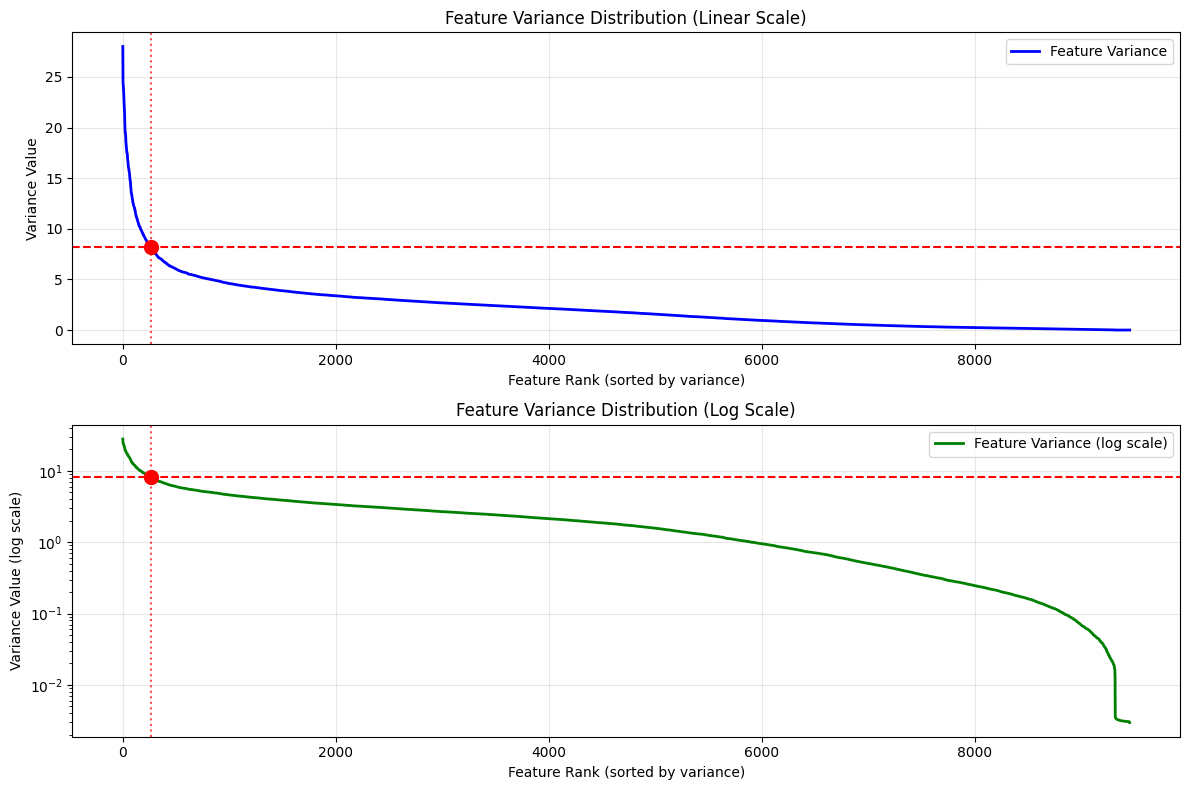

Pass 2: Filtering columns (Retaining 264 features)...
📊 Filtered 120 files down to 20 matching criteria
VARIANCE Result Shape: (45000, 269)



Accept VARIANCE results? (y/N):  y


Results accepted and cached to pipeline_cache/variance.pkl
Variance Output: (45000, 269)

CLASS ASSIGNMENT
Choose class assignment method:
1. Default: construct + subconstruct
2. GMM: Gaussian Mixture Model (shared states)
3. Spectral: Non-linear spectral clustering
4. TICA: Kinetic landscape state assignment


Enter choice (1-4):  1


Assigned 2 construct-based classes


Found cached result for MPSO (pipeline_cache/mpso.pkl). Load? (Y/n):  n



[FEATURE_SELECTION : MPSO]
📋 Parameter Controls:
  🔬 Method: Multi-objective PSO - balances accuracy vs sparsity
⚙️  Hyperparameters:
  dims: None - Output dimensions (None = default 5)
  candidate_limit: None - Max features for optimization (None = Dynamic selection via Fisher Score Knee)
  knee_S: 2.0 - Sensitivity for the candidate filtering knee - higher = more features
  max_iter: 10 - PSO iterations - higher = better optimization
  population_size: 40 - Swarm population size - larger = better search
  alpha: 0.9 - Accuracy-sparsity tradeoff - 0.0=accuracy, 1.0=sparsity
  threshold: 0.5 - Feature selection threshold - higher = fewer features
  redundancy_weight: 0.2 - Dimension independence penalty (0.0=none, 1.0=max redundancy reduction)
  stride: 15 - Data sampling stride - higher = less data



Modify? (y/N):  n


Running MPSO...
Pass 1: Computing Fisher scores (stride=15)...
Dynamic candidate selection: Fisher score knee at index 65 (66 features)
MPSO: Output dimensions set to default (dims=5)
Pass 2: Loading search data (stride=15)...
Beginning Swarm Optimization on 3000 samples...
.........  > Evaluations completed: 50...
.........  > Evaluations completed: 100...
.........  > Evaluations completed: 150...
.........  > Evaluations completed: 200...
.........  > Evaluations completed: 250...
.........  > Evaluations completed: 300...
.........  > Evaluations completed: 350...
.........  > Evaluations completed: 400...
........
✅ Optimization complete.
Pass 3: Recovering all rows and applying projection...
📊 Generating MPSO diagnostic plots...
Visualization failed: Data must be 1-dimensional, got ndarray of shape (2000, 2) instead
MPSO Result Shape: (45000, 11)



Accept MPSO results? (y/N):  y


Results accepted and cached to pipeline_cache/mpso.pkl


Found cached result for CHI_SQ_AMINO (pipeline_cache/chi_sq_amino.pkl). Load? (Y/n):  n



[FEATURE_SELECTION : CHI_SQ_AMINO]
📋 Parameter Controls:
  🔬 Method: Chi-square selection with AMINO reduction
⚙️  Hyperparameters:
  stride: 25 - Data sampling stride - higher = less memory usage
  max_amino: None - Target features (None = Dynamic selection via AMINO Distortion Jump method)
  q_bins: 5 - Quantile bins for chi-square - higher = more resolution
  sample_rows: 20000 - Sample size for binning - higher = more accurate bins
  knee_S: 5.0 - Sensitivity for the initial Chi-Square candidate knee - higher = more features



Modify? (y/N):  n


Running CHI_SQ_AMINO...
Successfully imported Optimized AMINO (Parallel)
Sampling to estimate Chi-Squared bin edges and classes...
Building Chi-Squared scores sequentially (stride=25)...
Knee Point: 23.2932 | Candidates: 107
Loading 107 features (stride=25)...
Running AMINO on 107 candidates...
AMINO: Dynamic feature selection enabled. Searching up to 40 clusters...
Selected bandwidth: 0.6307790537570579

Calculating all pairwise distances...
[########################################] | 100% Completed | 91.59 s
✅ Selected 3 final features.
📊 Generating AMINO diagnostic plots...


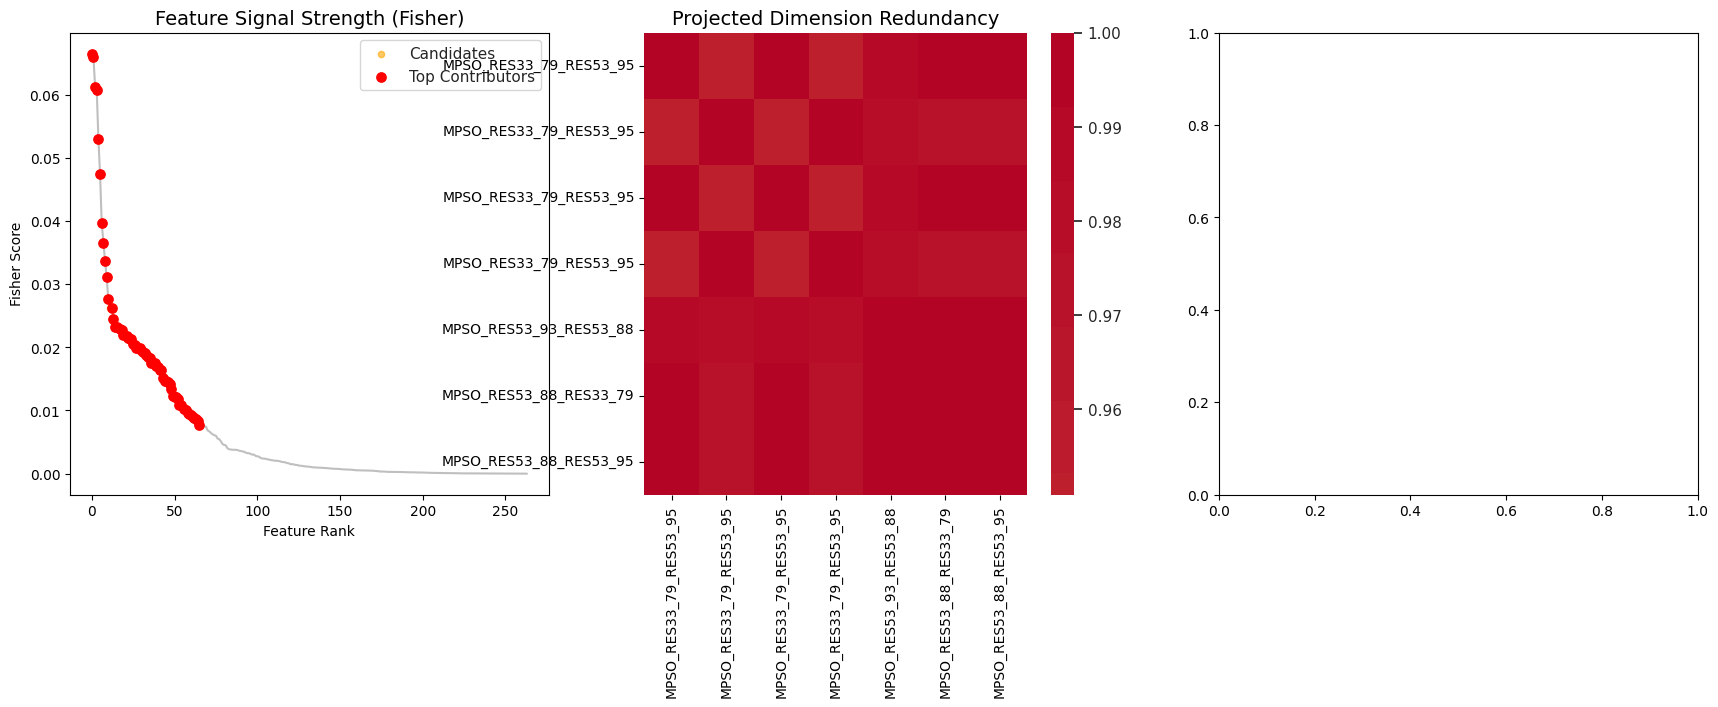

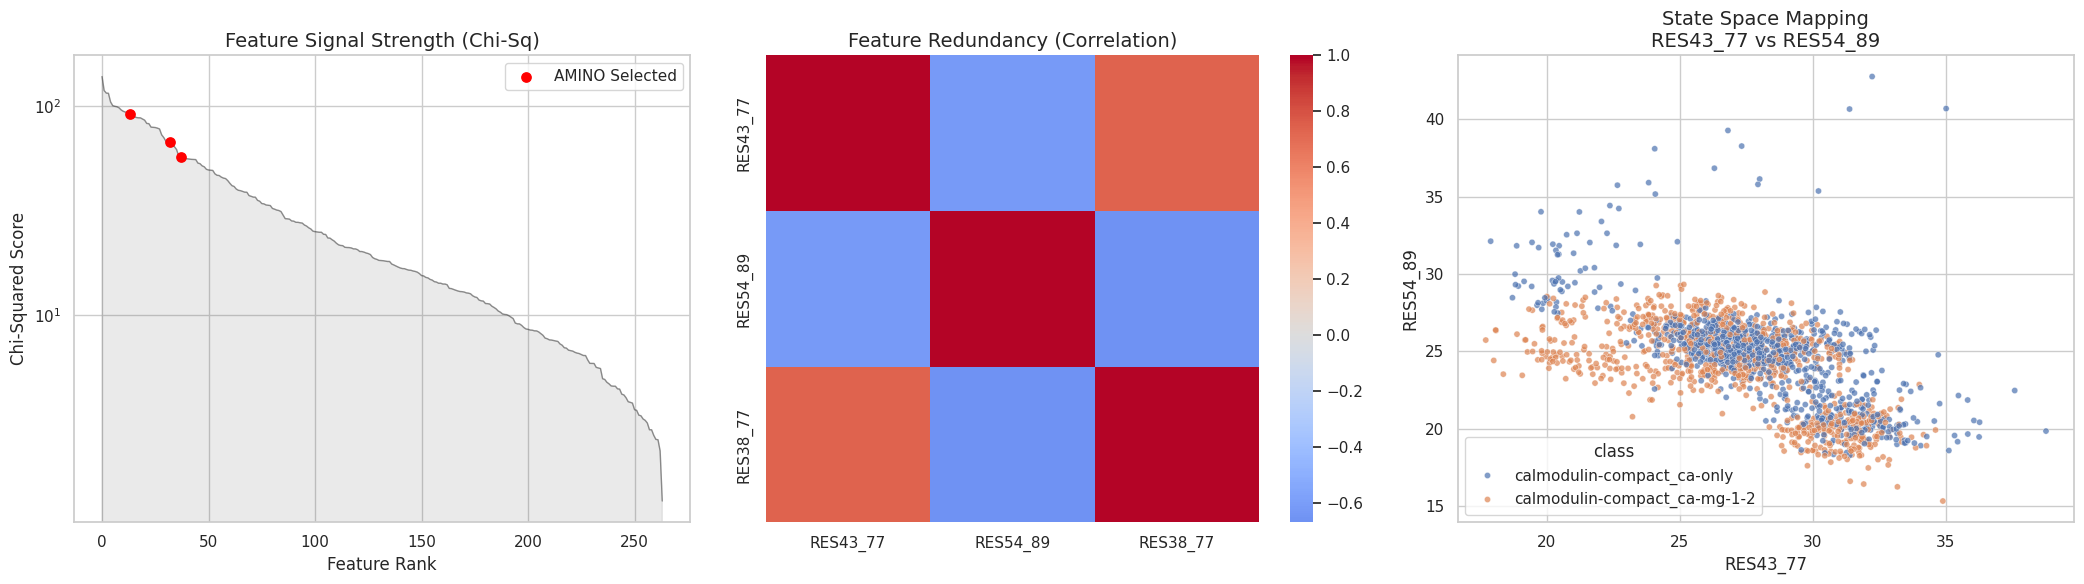

Pass 3: Extracting all rows for the 3 selected features...
Loading 3 features (stride=1)...
CHI_SQ_AMINO Result Shape: (45000, 7)



Accept CHI_SQ_AMINO results? (y/N):  y


Results accepted and cached to pipeline_cache/chi_sq_amino.pkl


Found cached result for BPSO (pipeline_cache/bpso.pkl). Load? (Y/n):  n



[FEATURE_SELECTION : BPSO]
📋 Parameter Controls:
  🔬 Method: Binary PSO - swarm intelligence for feature selection
⚙️  Hyperparameters:
  candidate_limit: None - Max features for optimization (None = Dynamic selection via Fisher Score Knee)
  knee_S: 2.0 - Sensitivity for the candidate filtering knee - higher = more features
  population_size: 20 - Swarm size - more particles = better exploration
  max_iter: 30 - Max iterations - higher = more optimization
  w: 0.729 - Inertia weight - controls exploration vs exploitation
  c1: 1.49445 - Cognitive parameter - individual learning influence
  c2: 1.49445 - Social parameter - swarm influence
  stride: 10 - Data sampling stride - higher = less data



Modify? (y/N):  n


Running BPSO...
Pass 1: Filtering features via Streaming Fisher Score (stride=10)...
Dynamic candidate selection: Fisher score knee at index 30 (31 features)
Pass 2: Loading 31 features (stride=10)...
Beginning Swarm Optimization on 4500 samples...
.........  > Evaluations completed: 50...
.........  > Evaluations completed: 100...
.........  > Evaluations completed: 150...
.........  > Evaluations completed: 200...
.........  > Evaluations completed: 250...
.........  > Evaluations completed: 300...
.........  > Evaluations completed: 350...
.........  > Evaluations completed: 400...
.........  > Evaluations completed: 450...
.........  > Evaluations completed: 500...
.........  > Evaluations completed: 550...
.........  > Evaluations completed: 600...
....
✅ Final selection: 11 features.


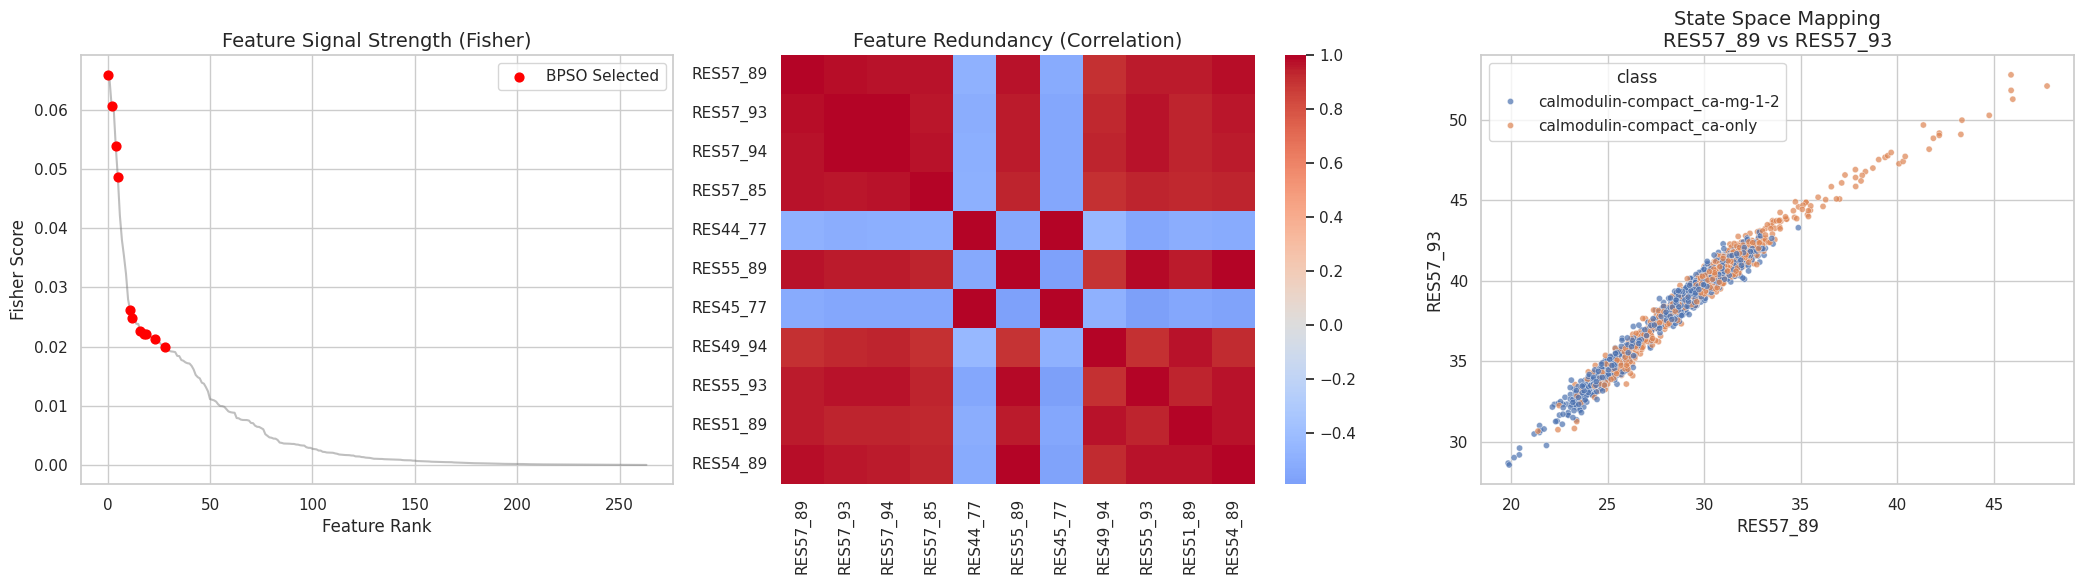

Pass 3: Recovering all rows for 11 features...
BPSO Result Shape: (45000, 17)



Accept BPSO results? (y/N):  y


Results accepted and cached to pipeline_cache/bpso.pkl


Found cached result for FISHER_AMINO (pipeline_cache/fisher_amino.pkl). Load? (Y/n):  n



[FEATURE_SELECTION : FISHER_AMINO]
📋 Parameter Controls:
  🔬 Method: Fisher scoring with AMINO dimensionality reduction
⚙️  Hyperparameters:
  max_outputs: None - Target features (None = Dynamic selection via AMINO Distortion Jump method)
  knee_S: 2.0 - Sensitivity for the initial Fisher candidate knee - higher = more features



Modify? (y/N):  n


Running FISHER_AMINO...
Successfully imported Optimized AMINO (Parallel)
Calculating Fisher scores sequentially...
Found classes: ['calmodulin-compact_ca-mg-1-2', 'calmodulin-compact_ca-only']
Loading 20 candidate features into memory...
Running AMINO on 20 candidates...
AMINO: Dynamic feature selection enabled. Searching up to 40 clusters...
Selected bandwidth: 0.36888182841575284

Calculating all pairwise distances...
[########################################] | 100% Completed | 6.51 sms
📊 Generating AMINO diagnostic plots...


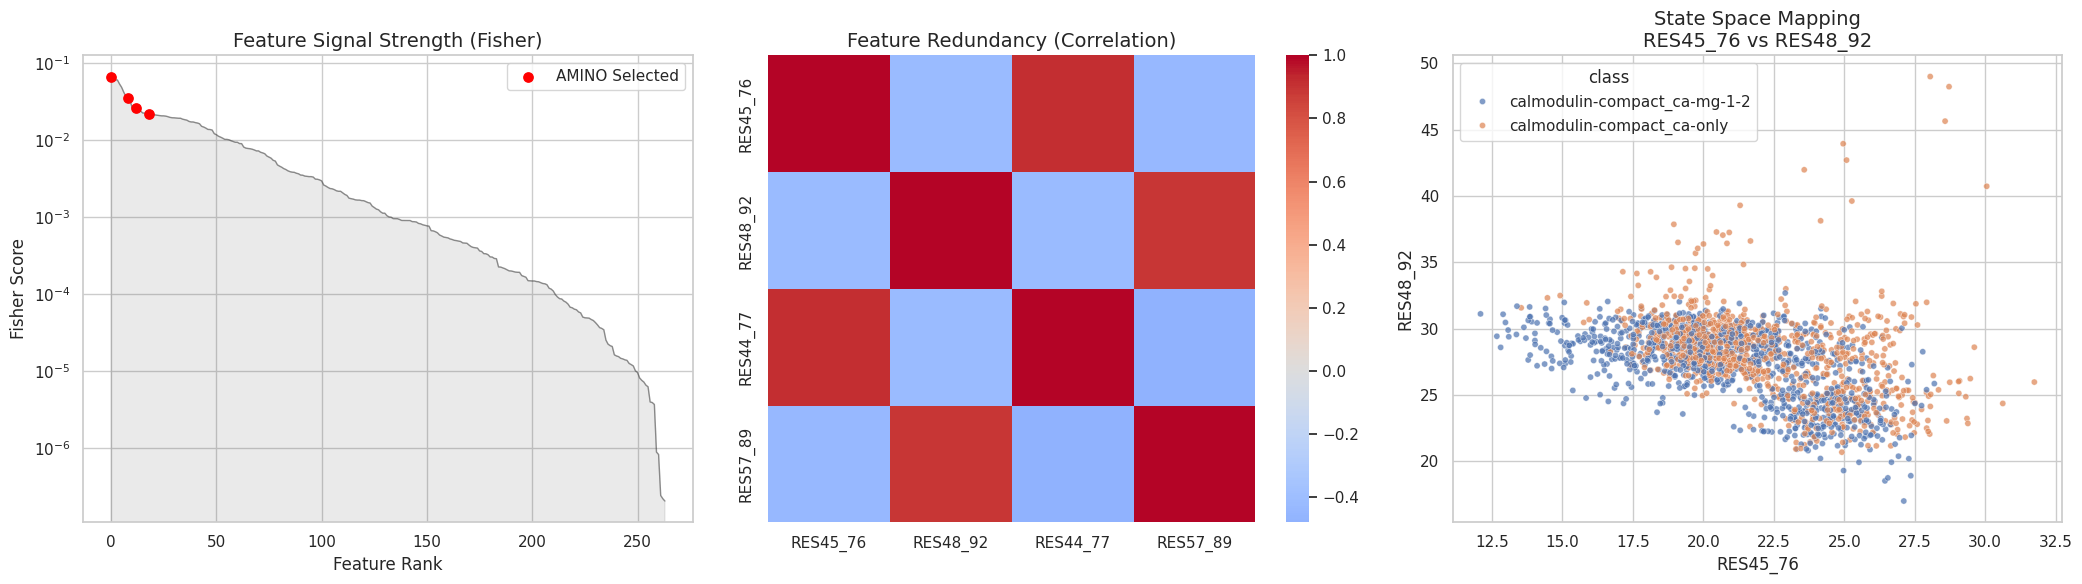

FISHER_AMINO Result Shape: (45000, 10)



Accept FISHER_AMINO results? (y/N):  y


Results accepted and cached to pipeline_cache/fisher_amino.pkl

🤖 AUTOMATED DIMENSIONALITY REDUCTION PHASE


Found existing DR caches. Recompute ALL methods? (y/N):  y


No further interaction required. Results will be saved automatically.
🚀 Processing: BPSO ➔ FLDA
Performing SVD on 11 features...
Dynamic dimensionality selection: 1 components capture 95% scatter variance
Selected features (11): ['RES57_89', 'RES57_93', 'RES57_94', 'RES57_85', 'RES44_77', 'RES55_89', 'RES45_77', 'RES49_94', 'RES55_93', 'RES51_89']...
Result: SUCCESS (Saved to bpso_to_flda.pkl)
🚀 Processing: BPSO ➔ PCA
Dynamic dimensionality selection: target = 95% variance
Shape before PCA:  (45000, 11)
Shape after PCA: (45000, 2) (Captured 96.66% variance)
Variances: [86.49223318 14.66377116]
Variance ratios: [0.82644706 0.14011467]
Selected features (11): ['RES57_89', 'RES57_93', 'RES57_94', 'RES57_85', 'RES44_77', 'RES55_89', 'RES45_77', 'RES49_94', 'RES55_93', 'RES51_89']...
Result: SUCCESS (Saved to bpso_to_pca.pkl)
🚀 Processing: BPSO ➔ ZHLDA
ZHLDA Dynamic selection: 1 components capture 95% generalized scatter
ZHLDA: Optimizing 11 features...
Selected features (11): ['RES57_89', 

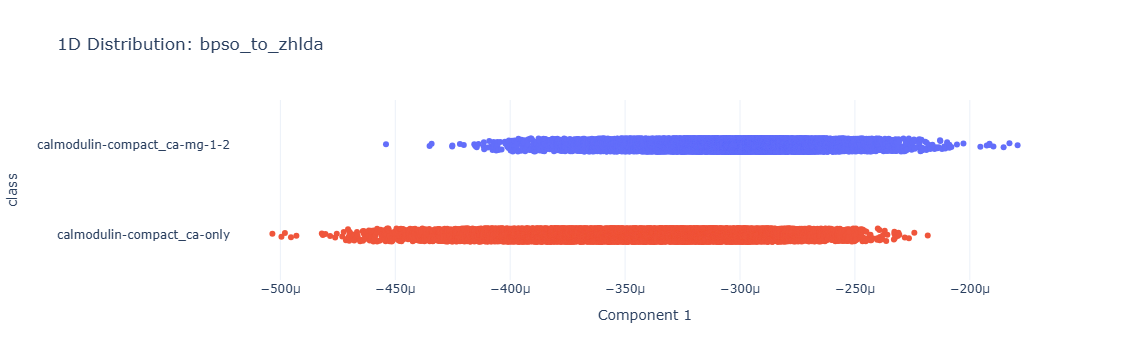

----------------------------------------------------------------------------------------------------
2     | fisher_amino_to_zhlda     | 0.2477       | 1
      📉 Selection Stats: 4 numeric features available for mapping.
      ↳ LD1 (100.0%): RES57_89 (-0.55), RES45_76 (-0.37), RES44_77 (-0.31), RES48_92 (-0.28)


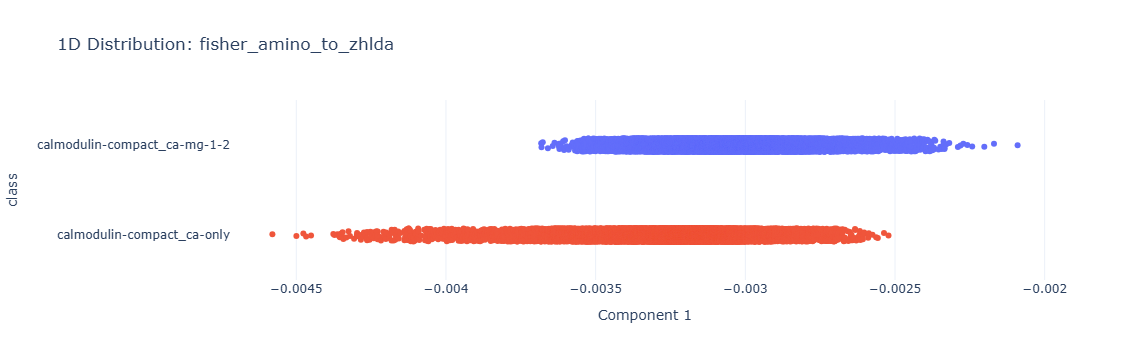

----------------------------------------------------------------------------------------------------
3     | fisher_amino_to_flda      | 0.1705       | 1
      📉 Selection Stats: 4 numeric features available for mapping.
      ↳ LD1 (100.0%): RES45_76 (0.52), RES48_92 (0.51), RES57_89 (0.50), RES44_77 (0.49)


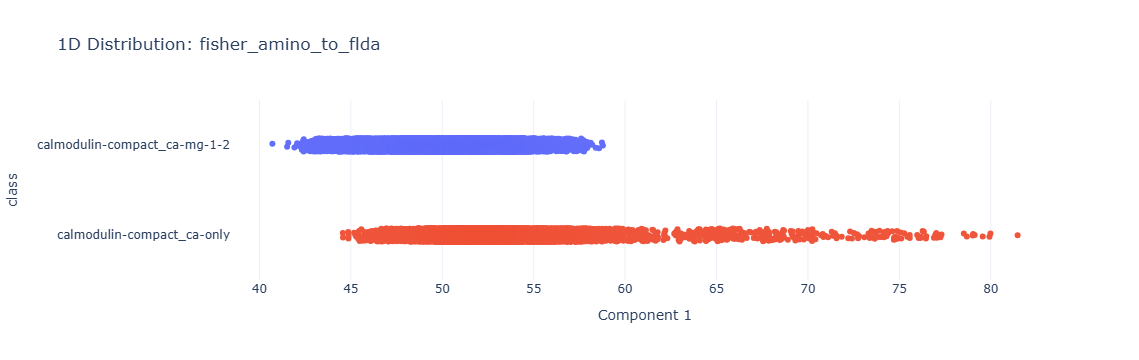

----------------------------------------------------------------------------------------------------
4     | fisher_amino_to_mhlda     | 0.1427       | 1
      📉 Selection Stats: 4 numeric features available for mapping.
      ↳ LD1 (100.0%): RES45_76 (0.67), RES44_77 (0.66), RES48_92 (0.35), RES57_89 (0.30)
----------------------------------------------------------------------------------------------------
5     | fisher_amino_to_gdhlda    | 0.1363       | 1
      📉 Selection Stats: 4 numeric features available for mapping.
      ↳ LD1 (100.0%): RES45_76 (-0.76), RES44_77 (-0.73), RES48_92 (-0.23), RES57_89 (-0.19)
----------------------------------------------------------------------------------------------------
6     | chi_sq_amino_to_zhlda     | 0.1143       | 1
      📉 Selection Stats: 3 numeric features available for mapping.
      ↳ LD1 (100.0%): RES54_89 (-0.45), RES43_77 (-0.42), RES38_77 (-0.15)
--------------------------------------------------------------------------------

In [4]:
print("🚀 Starting Interactive Pipeline Runner")
print("💡 Variance runs first, then feature selection, then dimensionality reduction")
print("⚙️  You'll set parameters for each phase")

# Use the pipeline runner
results, base_df = run_interactive_pipeline(data_factory, configs)

In [5]:
import pickle
from pathlib import Path

export_dir = Path("results/cmpcam_half")
export_dir.mkdir(parents=True, exist_ok=True)

try:
    with open(export_dir / "pipeline_results.pkl", "wb") as f:
        # Protocol 5 is faster and handles larger objects better
        pickle.dump(results, f, protocol=pickle.HIGHEST_PROTOCOL)

    with open(export_dir / "base_df_metadata.pkl", "wb") as f:
        pickle.dump(base_df, f, protocol=pickle.HIGHEST_PROTOCOL)
        
    print(f"✅ State preserved in {export_dir}/")
except Exception as e:
    print(f"❌ Save failed: {e}")

✅ State preserved in results/cmpcam_half/
